In [1]:
import sys
import os

import geopandas as gpd
import pandas as pd

from osgeo import gdal
from pyproj import CRS

In [2]:
clip = gpd.read_file("/home/philipp/Data/edin_diss/clip/GIS_clip.shp")

In [3]:
clip

,id,left,top,right,bottom,geometry
0,7025979.0,441224.1,410799.3152,441327.1,410696.3152,"POLYGON ((441327.100 410749.714, 441327.100 41..."
1,7025980.0,441224.1,410696.6152,441327.1,410593.6152,"POLYGON ((441295.561 410696.615, 441327.100 41..."
2,7025981.0,441224.1,410593.9152,441327.1,410490.9152,"POLYGON ((441228.848 410593.915, 441327.100 41..."
3,7025982.0,441224.1,410491.2152,441327.1,410388.2152,"POLYGON ((441313.863 410491.215, 441327.100 41..."
4,7028554.0,441326.8,410799.3152,441429.8,410696.3152,"POLYGON ((441429.800 410704.859, 441429.800 41..."
...,...,...,...,...,...,...
57,7046581.0,442045.7,410593.9152,442148.7,410490.9152,"MULTIPOLYGON (((442045.700 410593.915, 442148...."
58,7046582.0,442045.7,410491.2152,442148.7,410388.2152,"MULTIPOLYGON (((442045.700 410491.215, 442084...."
59,7046583.0,442045.7,410388.5152,442148.7,410285.5152,"POLYGON ((442071.492 410388.515, 442148.700 41..."
60,7046584.0,442045.7,410285.8152,442148.7,410182.8152,"POLYGON ((442045.700 410285.815, 442148.700 41..."


In [7]:
clip['percent'] = clip.area / 10609

In [5]:
103*103

10609

In [12]:
clip = clip[['id', 'percent']]

In [9]:
raw = gpd.read_file("/home/philipp/Data/edin_diss/clip/GIS_grid_9x9_selected.shp")

In [10]:
raw

,id,left,top,right,bottom,geometry
0,7025977.0,441224.1,411004.7152,441327.1,410901.7152,"POLYGON ((441224.100 411004.715, 441327.100 41..."
1,7025978.0,441224.1,410902.0152,441327.1,410799.0152,"POLYGON ((441224.100 410902.015, 441327.100 41..."
2,7025979.0,441224.1,410799.3152,441327.1,410696.3152,"POLYGON ((441224.100 410799.315, 441327.100 41..."
3,7025980.0,441224.1,410696.6152,441327.1,410593.6152,"POLYGON ((441224.100 410696.615, 441327.100 41..."
4,7025981.0,441224.1,410593.9152,441327.1,410490.9152,"POLYGON ((441224.100 410593.915, 441327.100 41..."
...,...,...,...,...,...,...
76,7046581.0,442045.7,410593.9152,442148.7,410490.9152,"POLYGON ((442045.700 410593.915, 442148.700 41..."
77,7046582.0,442045.7,410491.2152,442148.7,410388.2152,"POLYGON ((442045.700 410491.215, 442148.700 41..."
78,7046583.0,442045.7,410388.5152,442148.7,410285.5152,"POLYGON ((442045.700 410388.515, 442148.700 41..."
79,7046584.0,442045.7,410285.8152,442148.7,410182.8152,"POLYGON ((442045.700 410285.815, 442148.700 41..."


In [13]:
merge = raw.merge(clip, on='id')

In [14]:
merge

,id,left,top,right,bottom,geometry,percent
0,7025979.0,441224.1,410799.3152,441327.1,410696.3152,"POLYGON ((441224.100 410799.315, 441327.100 41...",0.054311
1,7025980.0,441224.1,410696.6152,441327.1,410593.6152,"POLYGON ((441224.100 410696.615, 441327.100 41...",0.644734
2,7025981.0,441224.1,410593.9152,441327.1,410490.9152,"POLYGON ((441224.100 410593.915, 441327.100 41...",0.689525
3,7025982.0,441224.1,410491.2152,441327.1,410388.2152,"POLYGON ((441224.100 410491.215, 441327.100 41...",0.002361
4,7028554.0,441326.8,410799.3152,441429.8,410696.3152,"POLYGON ((441326.800 410799.315, 441429.800 41...",0.396420
...,...,...,...,...,...,...,...
57,7046581.0,442045.7,410593.9152,442148.7,410490.9152,"POLYGON ((442045.700 410593.915, 442148.700 41...",0.901605
58,7046582.0,442045.7,410491.2152,442148.7,410388.2152,"POLYGON ((442045.700 410491.215, 442148.700 41...",0.880874
59,7046583.0,442045.7,410388.5152,442148.7,410285.5152,"POLYGON ((442045.700 410388.515, 442148.700 41...",0.958129
60,7046584.0,442045.7,410285.8152,442148.7,410182.8152,"POLYGON ((442045.700 410285.815, 442148.700 41...",1.000000


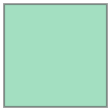

In [22]:
merge.loc[0, 'geometry']

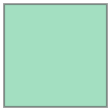

In [26]:
merge['geometry'].iloc[0]

In [25]:
merge.total_bounds

array([441224.09999971, 410080.11519993, 442148.69999971, 411004.71519993])

In [27]:
merge.bounds

,minx,miny,maxx,maxy
0,441224.1,410696.3152,441327.1,410799.3152
1,441224.1,410593.6152,441327.1,410696.6152
2,441224.1,410490.9152,441327.1,410593.9152
3,441224.1,410388.2152,441327.1,410491.2152
4,441326.8,410696.3152,441429.8,410799.3152
...,...,...,...,...
57,442045.7,410490.9152,442148.7,410593.9152
58,442045.7,410388.2152,442148.7,410491.2152
59,442045.7,410285.5152,442148.7,410388.5152
60,442045.7,410182.8152,442148.7,410285.8152


In [36]:
x = merge.iloc[61,:]

In [38]:
x

id                                                7.04658e+06
left                                                   442046
top                                                    410183
right                                                  442149
bottom                                                 410080
geometry    POLYGON ((442045.6999997132 410183.11519993, 4...
percent                                              0.994014
Name: 61, dtype: object

In [37]:
x.top

410183.11519993

In [28]:
## create ground truth

In [29]:
# load raw vector data
db_data = gpd.read_file("/home/philipp/Data/edin_diss/GIS_df/gis_df_wwie_2019.shp")

In [39]:
# pixel resolution
#pixel = 0.2000000000000000111
pixel = 0.2

# boundries
c0 = x.left
c1 = x.bottom
c2 = x.right
c3 = x.top

#
name = "gis_df_wwie_2019"
name_layer = "df"
path_shp = "/home/philipp/Data/edin_diss/GIS_df/" + name + ".shp"
path_out = "/home/philipp/Data/edin_diss/test_ww.tif"

In [40]:
# create string for bash command
bashCommand = "gdal_rasterize -l " + name + " -a " + name_layer + " -tr " + str(pixel) + " " + str(pixel) + \
" -a_nodata 0.0 -te " + str(c0) + " " + str(c1) + " " + str(c2) + " " + str(c3) + \
" -ot Byte -of GTiff " + path_shp + " " + path_out

# execute bash command
os.system(bashCommand)

0